In [1]:
import sys
!{sys.executable} -m pip install boruta

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dependencies.feature_selection import remover_colunas_constantes, chi_squared, boruta_selector, variance_threshold_selector

In [20]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_PATH = os.path.join('..','data','interim')  
DATA_INTER_TRAIN_NAME_2 = 'df_train_1.csv'
DATA_INTER_TRAIN_A1 = 'train_inter_a1.csv'
IMG_PATH = os.path.abspath(os.path.join('..','reports', 'figures'))

In [21]:
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME_2))
df_train.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,...,fatura_jun,fatura_mai,fatura_abr,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,Y
0,50000,1,1,2,28,2,0,0,0,0,...,28094,29138,30625,2500,2000,1200,1500,2000,1500,1
1,120000,2,3,1,51,0,0,0,2,2,...,34236,34734,35292,2800,6000,1200,1300,1200,0,0
2,370000,2,1,2,35,0,0,-2,-1,-1,...,2329,156619,155988,0,0,2430,161450,6035,6439,0
3,30000,1,2,2,30,0,0,0,0,0,...,24743,25261,25763,1391,1403,886,917,922,955,0
4,200000,1,2,1,28,2,2,7,7,7,...,2443,2443,2443,0,0,0,0,0,0,1


In [29]:
variaveis_numericas = set(df_train.columns.tolist())

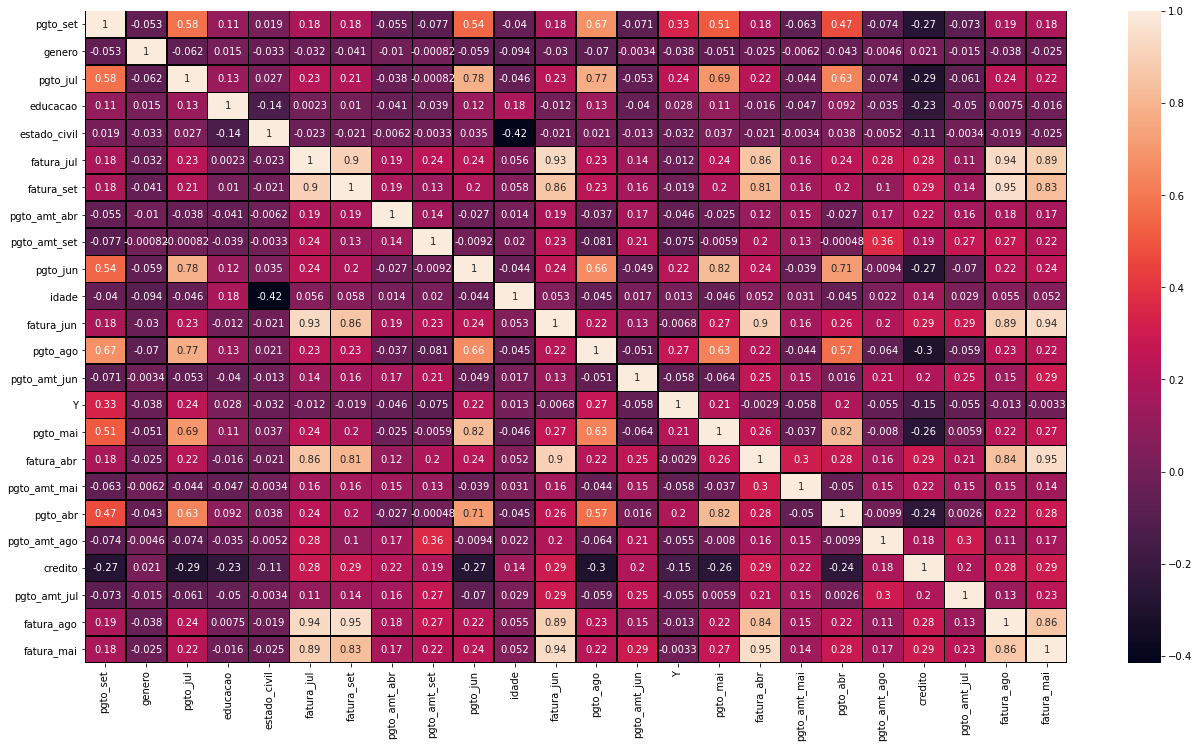

In [31]:
corr_matrix = df_train.loc[:, variaveis_numericas].corr()
plt.subplots(figsize=(22, 12))
sns.heatmap(corr_matrix,
            linecolor='black',
            linewidths=.5,
            annot=True,
            annot_kws={"fontsize":10})
plt.savefig(os.path.join(IMG_PATH,'grafico_correlacao_pearson.png'), format='png')
plt.show()

In [32]:
lista_correlacao = corr_matrix['Y'].sort_values(axis=0,ascending=False).iloc[1:]
lista_correlacao = abs(lista_correlacao)

In [33]:
lista_descart_corr = lista_correlacao[lista_correlacao < 0.01].index.tolist()
lista_descart_corr

['fatura_abr', 'fatura_mai', 'fatura_jun']

__Chi2__

In [35]:
chi2_df, logs = chi_squared(df_train, y = 'Y', cols = variaveis_numericas)
chi2_df

,column,p-value,chi2_value
0,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
1,"{pgto_set, genero, pgto_jul, educacao, estado_...",2.020880e-07,27.013035
2,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
3,"{pgto_set, genero, pgto_jul, educacao, estado_...",4.093999e-20,93.390649
4,"{pgto_set, genero, pgto_jul, educacao, estado_...",1.097508e-05,22.839766
5,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
6,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
7,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
8,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN
9,"{pgto_set, genero, pgto_jul, educacao, estado_...",NaN,NaN


In [36]:
logs

['A coluna pgto_set não pode ser avaliada. ',
 'A coluna pgto_jul não pode ser avaliada. ',
 'A coluna fatura_jul não pode ser avaliada. ',
 'A coluna fatura_set não pode ser avaliada. ',
 'A coluna pgto_amt_abr não pode ser avaliada. ',
 'A coluna pgto_amt_set não pode ser avaliada. ',
 'A coluna pgto_jun não pode ser avaliada. ',
 'A coluna idade não pode ser avaliada. ',
 'A coluna fatura_jun não pode ser avaliada. ',
 'A coluna pgto_ago não pode ser avaliada. ',
 'A coluna pgto_amt_jun não pode ser avaliada. ',
 'A coluna Y não pode ser avaliada. ',
 'A coluna pgto_mai não pode ser avaliada. ',
 'A coluna fatura_abr não pode ser avaliada. ',
 'A coluna pgto_amt_mai não pode ser avaliada. ',
 'A coluna pgto_abr não pode ser avaliada. ',
 'A coluna pgto_amt_ago não pode ser avaliada. ',
 'A coluna credito não pode ser avaliada. ',
 'A coluna pgto_amt_jul não pode ser avaliada. ',
 'A coluna fatura_ago não pode ser avaliada. ',
 'A coluna fatura_mai não pode ser avaliada. ']

In [41]:
lista_descart_chi2 = chi2_df[chi2_df['p-value']>=0.05]['column'].tolist()

In [ ]:
df_train.drop(set(lista_descart_corr), axis=1, inplace=True)

In [51]:
df_train.head()

,credito,genero,educacao,estado_civil,idade,pgto_set,pgto_ago,pgto_jul,pgto_jun,pgto_mai,...,fatura_set,fatura_ago,fatura_jul,pgto_amt_set,pgto_amt_ago,pgto_amt_jul,pgto_amt_jun,pgto_amt_mai,pgto_amt_abr,Y
0,50000,1,1,2,28,2,0,0,0,0,...,48508,45951,44013,2500,2000,1200,1500,2000,1500,1
1,120000,2,3,1,51,0,0,0,2,2,...,26496,28586,33828,2800,6000,1200,1300,1200,0,0
2,370000,2,1,2,35,0,0,-2,-1,-1,...,40229,-101,-101,0,0,2430,161450,6035,6439,0
3,30000,1,2,2,30,0,0,0,0,0,...,22221,23248,24260,1391,1403,886,917,922,955,0
4,200000,1,2,1,28,2,2,7,7,7,...,2443,2443,2443,0,0,0,0,0,0,1


In [52]:
df_train.to_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_A1), index=False)